In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sympy import Eq, Symbol, solve

In [2]:
import McExperiment
from McExperiment import *
import importlib
importlib.reload(McExperiment)

<module 'McExperiment' from 'd:\\OneDriveLenovoD\\OneDrive\\A_Fall23\\FIN535\\HW2023\\FIN535-Final-23F\\Dec20\\FIN535-Final-23F\\McExperiment.py'>

In [3]:
data = pd.read_csv('data.csv')
data['month'] = data['month'].apply(lambda x: datetime.strptime(x, '%Y-%m')) #assume each date per month is the last day
data.set_index(['month'],inplace=True)

### Simple dynamic decision path 
Change Decision Each year

- Assume Maria really wants to get her condo in 5 years (no car purchase this time)

In [7]:
SAVE = 40000
CAP = 50000
g = 0.11
MC = 500
path_length = 120 # 10 year
tax_rate = 0.25
# Get the analysis for end of 5Y/7Y/10Y 
Simu_table, Simu_cap_table = Experiments_dynamic(MC,120,data,CAP,SAVE,g,years=[60,84,120],tax=tax_rate)
Summary_table,cap_table = GetSummary(Simu_table, Simu_cap_table, path_length)
Summary_table = Summary_table.fillna(0)

,Expected Cap,Std Cap,Exp Cap < 500k,Prob >= 500k,Expected Annual_sharpe,Expected Annual_sortino,Expected MDD,ret VaR,ret CVaR,cap VaR,cap CVaR
5Y,294919.90,80513.27,291886.76,0.01,1.36,1.84,0.35,-0.00,-0.00,163987.80,163987.80
7Y,542414.65,117299.63,434116.00,0.57,1.34,1.83,0.43,-0.01,-0.01,362879.97,355390.11
10Y,1396852.96,262187.42,0.00,1.00,1.49,2.05,0.44,-0.01,-0.01,906160.10,891257.14


In [14]:
from scipy.optimize import fsolve

# Define the equation as a function
def equation(x):
    return 50*((1+x)**5) + 40*((1+x)**4) + 44.4*((1+x)**3) + 49.284*((1+x)**2) + 54.705*(1+x) - 500

# Initial guess for the root
initial_guess = 0.0

# Solve the equation
solution = fsolve(equation, initial_guess)

print("Solution:", solution)


Solution: [0.26327164]


In average, yearly return should be 26.3%

In [10]:
Summary_table.to_csv('storage cache/dyanmic.csv')

In [26]:
subdf = data.iloc[48:120:,:] # Data from the last 10 years

SAVE = 40000
CAP = 50000
g = 0.11
MC = 500
path_length = 120 # 10 year
tax_rate = 0.25

paths = []
paths.append(MC_generate_dynamic(subdf, CAP, SAVE, g))

In [27]:
alloc_ratio = pd.DataFrame(np.array([[0.6, 0.45, 0.3, 0.7, -0.05], [0.65,0.9,0.45,0.7,-0.55]]),\
    columns = ['x1','x2','x3','x4','x5'], index = ['alloc_1','alloc_2'])

for i in range(2):
    ratio = (alloc_ratio.iloc[i,:]).to_list()
    paths.append(MC_generate(subdf, CAP, SAVE, g, ratio))

In [28]:
df1 = pd.concat(paths,axis=1).iloc[:,np.r_[2,6,10]]
df1.columns = ['dynamic','alloc_1','alloc_2']

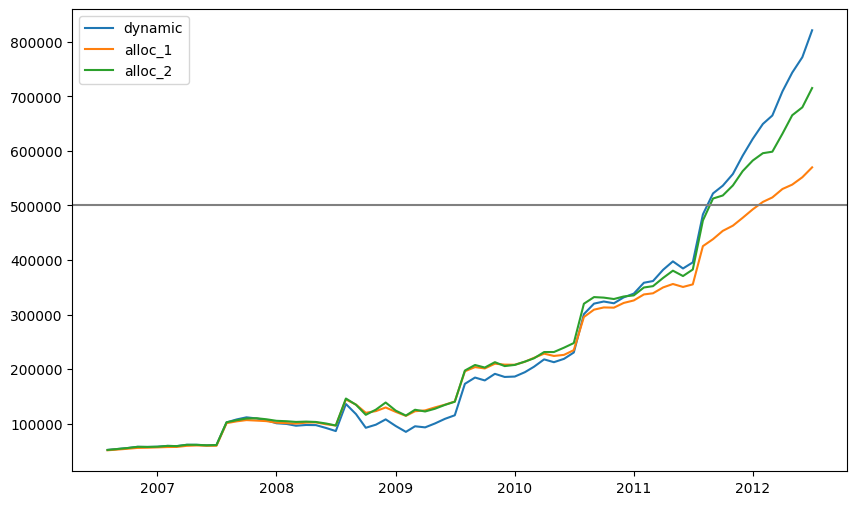

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df1)
plt.axhline(y=500000, color='grey', linestyle='-')
plt.legend(['dynamic','alloc_1','alloc_2'])
plt.savefig('figures/dynamics_pre2012_capitalplot.png',bbox_inches='tight')
plt.show()